In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/anaemia-prediction/output.csv


In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/anaemia-prediction/output.csv')

In [4]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [5]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [6]:
df.drop(columns={'Number'},inplace=True)

In [7]:
df['Sex'].value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [8]:
#First rename the column Sex to Male
df.rename(columns={'Sex':'Male'},inplace=True)
#Since there are four different Sex values, there might be a misspelling. I figured out that we got 'M' and 'M ','F' and 'F '
#for male and female respectively.Hence we need to transform all of them into an integer
df['Male'].replace({'M':1,'M ':1,'F':0,'F ':0},inplace=True)

In [9]:
df['Anaemic'].replace({'Yes':1,'No':0},inplace=True)

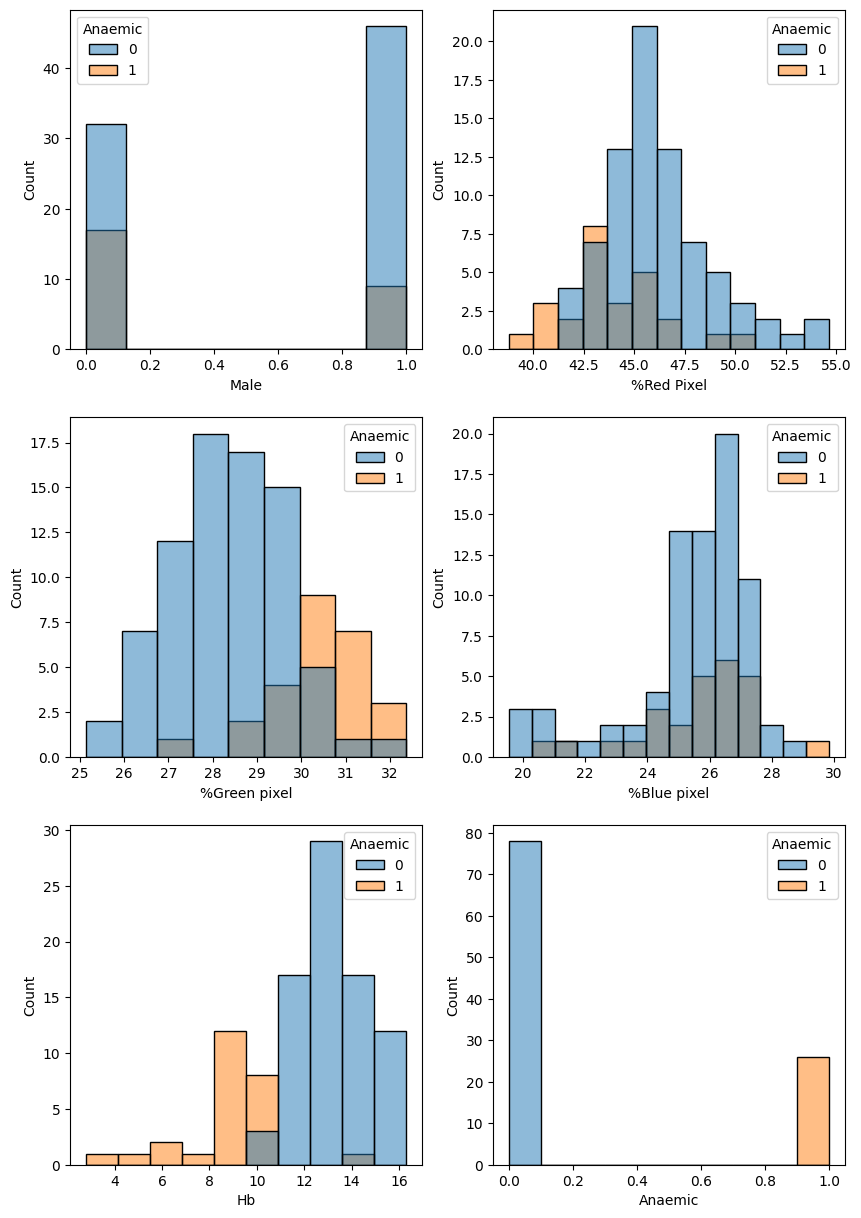

In [10]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(10,15))
axs=axs.flat
for i in range(len(df.columns)):
    sns.histplot(data=df,x=df.columns[i],ax=axs[i],hue='Anaemic')
plt.show()

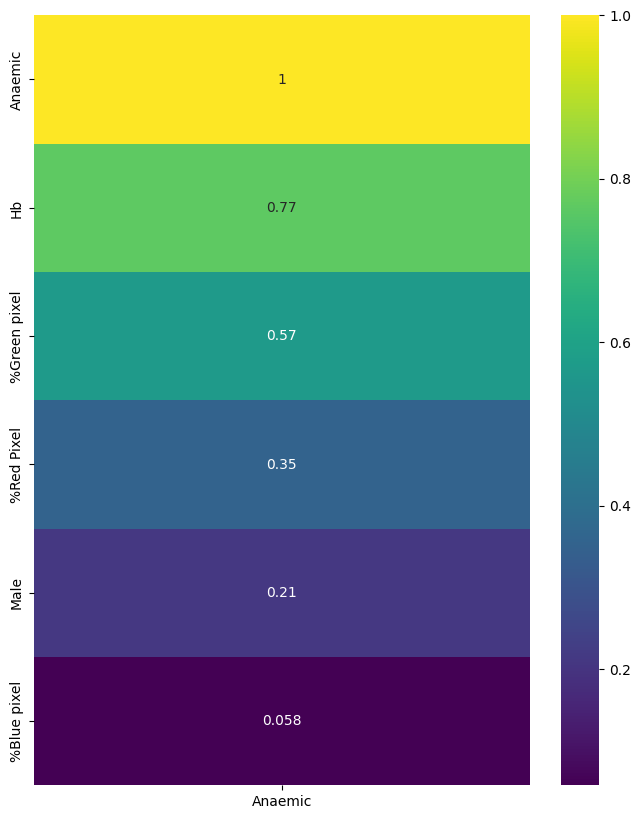

In [11]:
corr=df.corr()['Anaemic']
corr=corr.abs().sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.heatmap(corr.to_frame(),annot=True,cmap='viridis')
plt.show()

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
#Seperate the features from the target value
X=df.drop('Anaemic',axis=1).to_numpy()
y=df['Anaemic']

In [14]:
#Use standardscaler to scale the feature variables
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [15]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=42)

In [16]:
#Train model 
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [17]:
confusion_matrix(y_test,y_predict)

array([[25,  0],
       [ 0,  7]])

In [18]:
accuracy_score(y_test,y_predict)

1.0